# **Preprocesamiento de datos proyecto CONTUGAS_Gerencia de proyectos de Analytics. Guía 4**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cargando el archivo Excel
file_path = "Contugas_Datos.xlsx"
excel_data = pd.ExcelFile(file_path)

# Lista para almacenar los DataFrames de cada cliente
dataframes = []

# Iterar sobre cada hoja (cliente)
for sheet_name in excel_data.sheet_names:
    # Leer la hoja actual
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Agregar una columna 'Cliente' con el nombre de la hoja (cliente)
    df['Cliente'] = sheet_name
    # Añadir el DataFrame a la lista
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
Contugas = pd.concat(dataframes, ignore_index=True)

print(Contugas.head())


                Fecha    Presion  Temperatura    Volumen   Cliente
0 2019-01-14 00:00:00  17.732563    28.209354  20.969751  CLIENTE1
1 2019-01-14 01:00:00  17.747776    28.518614  17.845739  CLIENTE1
2 2019-01-14 02:00:00  17.758916    28.230191  20.975914  CLIENTE1
3 2019-01-14 03:00:00  17.727940    27.811509  20.592299  CLIENTE1
4 2019-01-14 04:00:00  17.746484    27.795293  21.690626  CLIENTE1


Se cargó la base de datos y se compilaron los datos de los clientes que se encontraban en las pestañas individuales del excel en un mismo dataframe, las columnas se encuentran nombradas correctamente según lo esperado.

In [3]:
# Ver los valores unicos de la columna 'Cliente'
clientes_unicos = Contugas['Cliente'].unique()
print("Clientes cargados en el DataFrame:", clientes_unicos)

# contar el número de clientes únicos
num_clientes = Contugas['Cliente'].nunique()
print(f"Número total de clientes únicos: {num_clientes}")


Clientes cargados en el DataFrame: ['CLIENTE1' 'CLIENTE2' 'CLIENTE3' 'CLIENTE4' 'CLIENTE5' 'CLIENTE6'
 'CLIENTE7' 'CLIENTE8' 'CLIENTE9' 'CLIENTE10' 'CLIENTE11' 'CLIENTE12'
 'CLIENTE13' 'CLIENTE14' 'CLIENTE15' 'CLIENTE16' 'CLIENTE17' 'CLIENTE18'
 'CLIENTE19' 'CLIENTE20']
Número total de clientes únicos: 20


En el paso anterior se confirma que se cargaron los 20 clientes de la base de datos original.

## 1.	Revisión de las características de calidad de los datos. 

#### Revision de valores faltantes y duplicados

In [4]:
# Completitud: Verificar valores faltantes
valores_faltantes = Contugas.isnull().sum()
print("Valores faltantes por columna:\n", valores_faltantes)

# porcentaje que representan
porcentaje_faltantes = Contugas.isnull().mean() * 100
print("\nPorcentaje de valores faltantes:\n", porcentaje_faltantes)


Valores faltantes por columna:
 Fecha          0
Presion        0
Temperatura    0
Volumen        0
Cliente        0
dtype: int64

Porcentaje de valores faltantes:
 Fecha          0.0
Presion        0.0
Temperatura    0.0
Volumen        0.0
Cliente        0.0
dtype: float64


In [5]:
# Verificar duplicados en el DataFrame
duplicados = Contugas.duplicated()
print("Número de filas duplicadas:", duplicados.sum())


Número de filas duplicadas: 0


La base de datos no presenta datos faltantes ni duplicados.Podemos resaltar que solo se encontraron valores negativos en la columna de temperatura, lo cual puede ser posible.


#### Coherencia

Dado que no se tiene un rango operativo predefinido para las variables Presión, Temperatura, y Volumen, se realizara un análisis exploratorio de coherencia utilizando estadísticas descriptivas y detectando posibles valores atípicos.

In [6]:
# Formato: Verificar tipos de datos
print("Tipos de datos:\n", Contugas.dtypes)

Tipos de datos:
 Fecha          datetime64[ns]
Presion               float64
Temperatura           float64
Volumen               float64
Cliente                object
dtype: object


In [7]:
# Convertir la columna de fecha a tipo datetime si no lo está
Contugas['Fecha'] = pd.to_datetime(Contugas['Fecha'], errors='coerce')

# Verificar formato de fecha y detectar errores de conversión
invalid_dates = Contugas[Contugas['Fecha'].isnull()]
print("\nFechas inválidas detectadas:\n", invalid_dates)


Fechas inválidas detectadas:
 Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, Cliente]
Index: []


In [8]:
#Análisis de Valores Atípicos con el Método IQR (Interquartile Range)
# Definiendo los percentiles 25 y 75 para calcular el rango intercuartílico (IQR)
Q1 = Contugas[['Presion', 'Temperatura', 'Volumen']].quantile(0.25)
Q3 = Contugas[['Presion', 'Temperatura', 'Volumen']].quantile(0.75)
IQR = Q3 - Q1

# Identificando valores atípicos fuera del rango (1.5 * IQR)
outliers = Contugas[~((Contugas[['Presion', 'Temperatura', 'Volumen']] >= (Q1 - 1.5 * IQR)) & 
                (Contugas[['Presion', 'Temperatura', 'Volumen']] <= (Q3 + 1.5 * IQR)))]

print("Valores atípicos detectados:\n", outliers[['Fecha', 'Presion', 'Temperatura', 'Volumen']])

Valores atípicos detectados:
        Fecha    Presion  Temperatura  Volumen
0        NaT        NaN          NaN      NaN
1        NaT        NaN          NaN      NaN
2        NaT        NaN          NaN      NaN
3        NaT        NaN          NaN      NaN
4        NaT        NaN          NaN      NaN
...      ...        ...          ...      ...
847955   NaT  15.751139          NaN      NaN
847956   NaT  15.614858          NaN      NaN
847957   NaT  15.598944          NaN      NaN
847958   NaT  15.730040          NaN      NaN
847959   NaT  15.624457          NaN      NaN

[847960 rows x 4 columns]


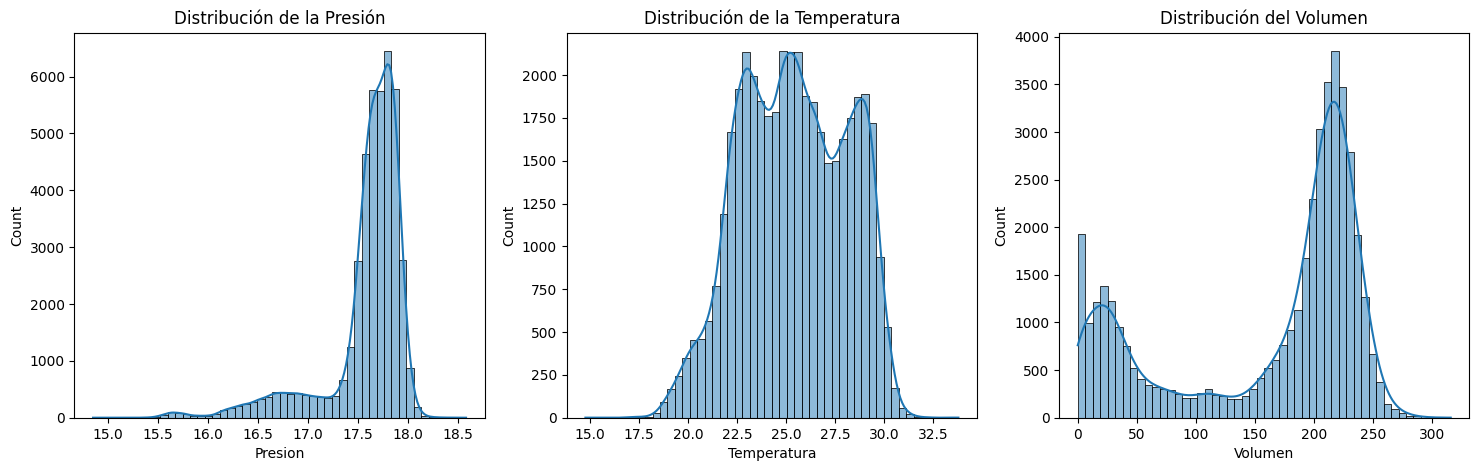

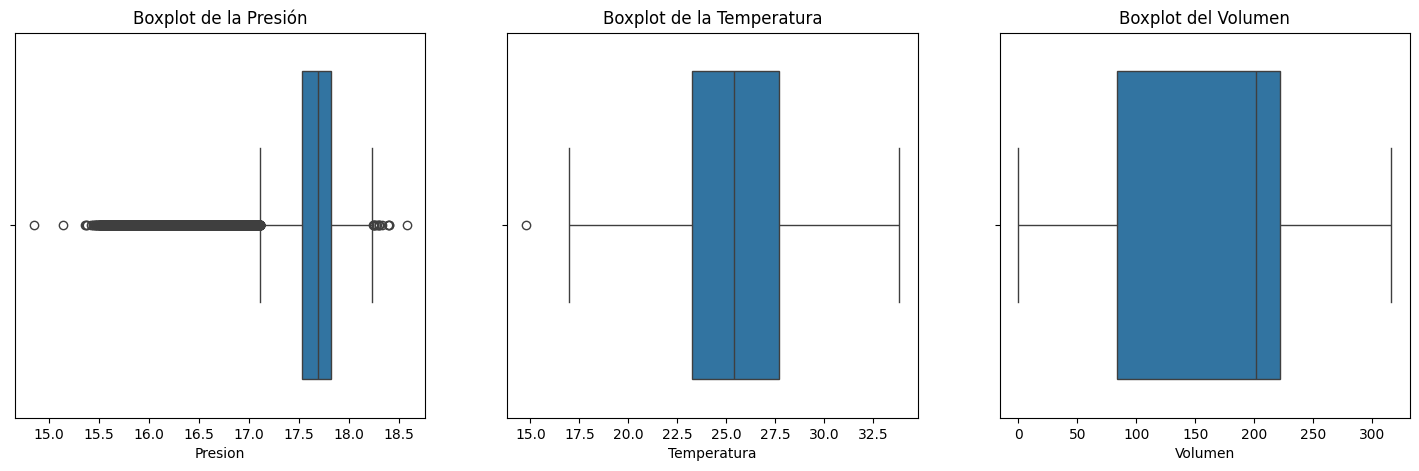

In [9]:
# Histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Presion'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución de la Presión')

sns.histplot(df['Temperatura'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribución de la Temperatura')

sns.histplot(df['Volumen'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribución del Volumen')

plt.show()

# Boxplots para identificar posibles outliers visualmente
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, x='Presion', ax=axes[0])
axes[0].set_title('Boxplot de la Presión')

sns.boxplot(data=df, x='Temperatura', ax=axes[1])
axes[1].set_title('Boxplot de la Temperatura')

sns.boxplot(data=df, x='Volumen', ax=axes[2])
axes[2].set_title('Boxplot del Volumen')

plt.show()

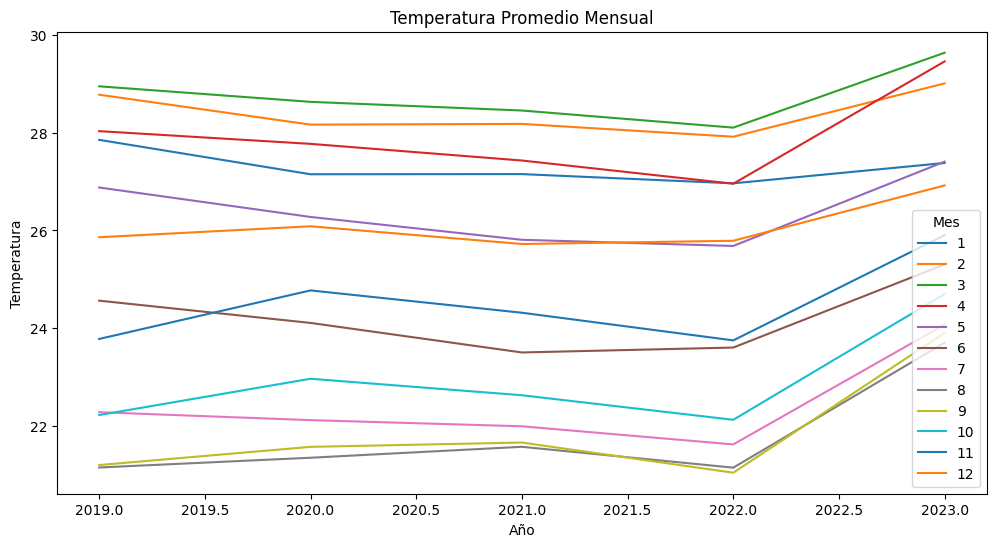


Análisis de Volumen por Cliente
             count        mean        std  min         25%         50%  \
Cliente                                                                  
CLIENTE8   43147.0  178.591825  90.850586  0.0   87.837958  221.111139   
CLIENTE16  43147.0  178.133946  74.649969  0.0  114.279073  210.869993   
CLIENTE20  42808.0  160.816734  82.779691  0.0   83.683978  201.764987   
CLIENTE6   42808.0  153.799976  84.906689  0.0   54.236215  198.223662   
CLIENTE11  42248.0  131.648637  34.225487  0.0  110.646887  136.075518   
CLIENTE3   42248.0  117.500121  39.856005  0.0   91.205546  125.520304   
CLIENTE2   41382.0   61.819045  17.495571  0.0   51.809989   61.814487   
CLIENTE18  41382.0   61.758087  18.201164  0.0   51.444677   62.074886   
CLIENTE12  41776.0   33.731496  41.952033  0.0    0.000000    0.000000   
CLIENTE7   41776.0   27.294379  33.875124  0.0    0.000000    0.000000   
CLIENTE17  43412.0   20.564425   5.566153  0.0   18.426473   21.748120   
CLIEN

In [10]:
#################################Temperatura###########################################3
# Extraer mes y año de la fecha
Contugas['Mes'] = Contugas['Fecha'].dt.month
Contugas['Año'] = Contugas['Fecha'].dt.year

# Calcular la temperatura promedio mensual
temperatura_promedio_mensual = Contugas.groupby(['Año', 'Mes'])['Temperatura'].mean().unstack()
temperatura_promedio_mensual.plot(figsize=(12, 6), title='Temperatura Promedio Mensual')
plt.ylabel("Temperatura")
plt.show()
#################################Volumen###########################################3
# Análisis de Volumen por Cliente
volumen_cliente = Contugas.groupby('Cliente')['Volumen'].describe()
print('\nAnálisis de Volumen por Cliente')
print(volumen_cliente.sort_values(by='mean', ascending=False))

# Filtrar casos de volúmenes elevados
high_volume = Contugas[Contugas['Volumen'] > Contugas['Volumen'].quantile(0.99)]  # Valores en el percentil 99
print("\n con volúmenes elevados:\n", high_volume[['Fecha', 'Cliente', 'Volumen']])

# Analizar la media y desviación estándar de cada cliente
cliente_summary = df.groupby('Cliente')[['Presion', 'Temperatura', 'Volumen']].agg(['mean', 'std'])
print(cliente_summary)


* La mayoría de los datos de presión están entre 17 y 18 unidades, con una ligera concentración alrededor de 17.5. Esto indica que hay una presión predominante en este rango.
* Existen valores atípicos en la presión hacia los extremos, especialmente valores más bajos (por debajo de 17), los cuales podrían ser valores inusuales o indicativos de fallos en la medición. Sin embargo, dado que la presión de 0 es coherente cuando no hay flujo, no necesariamente se deberían excluir estos valores bajos.
* La temperatura muestra una distribución con varios picos, indicando que el sistema pasa por varias condiciones térmicas comunes. La mayoría de los valores están entre 22 y 28 grados, lo cual podría ser el rango típico de operación.
* Los valores de la temperatura por debajo de 15 o por encima de 32 parecen ser extremos, y podrían revisarse para verificar su plausibilidad o la calibración de los sensores.
* El volumen tiene una gran cantidad de valores en 0, lo cual es consistente con la situación de que a veces no hay flujo de gas.
* Los valores de volumen fuera de la mediana (entre 20 y 100 unidades) son comunes, y algunos valores superiores a 200 pueden representar situaciones de alta demanda o picos operativos. La distribución sugiere que el volumen presenta una gran variabilidad, probablemente asociada a fluctuaciones en el flujo.
* Clientes con altos volúmenes y variabilidad en la demanda: CLIENTE8, CLIENTE16, CLIENTE20 y CLIENTE6 tienen los volúmenes más elevados, lo que sugiere una mayor dependencia del servicio o una demanda mayor. Sus datos también muestran desviaciones estándar altas, lo que indica fluctuaciones en el consumo.
* Clientes con menor consumo y valores bajos en volumen: CLIENTE5 y CLIENTE14 tienen promedios y desviaciones bajas, lo que indica un uso constante o mínimo.
Estabilidad en presión y temperatura: En general, la presión y temperatura tienden a mantenerse estables, lo cual es positivo desde un punto de vista operativo, ya que las fluctuaciones en volumen no afectan significativamente estos parámetros.

**Conclusión de la Coherencia:** 

* Presión y Volumen: Los valores de 0 pueden ser normales, como se comentó anteriormente, indicando ausencia de flujo. A pesar de algunos valores atípicos bajos en la presión, esta se mantiene en un rango aceptable.
* Temperatura: La distribución sugiere varias condiciones comunes, pero los valores atípicos bajos podrían requerir revisión para garantizar que reflejan la operación normal y no problemas en los sensores.
En general, los datos parecen tener coherencia en su mayoría, pero se podrían implementar reglas de validación adicionales para monitorear valores extremos y revisar patrones de errores en sensores o picos inusuales en el sistema de captura de datos.
* Este análisis puede ayudar a identificar patrones de consumo, clientes de alta demanda, y verificar la estabilidad en los parámetros operativos para mantener una operación segura y controlada

#### Análisis estadístico básico

In [11]:
print(Contugas.describe())

                               Fecha        Presion    Temperatura  \
count                         847960  847960.000000  847960.000000   
mean   2021-07-08 22:08:19.659418112      16.072957      25.198239   
min              2019-01-14 00:00:00       2.934873      -5.257899   
25%              2020-04-13 23:00:00      17.097350      22.693027   
50%              2021-07-07 06:00:00      17.570449      25.379859   
75%              2022-10-06 02:15:00      17.694254      27.886244   
max              2023-12-31 23:00:00      20.307852      50.019853   
std                              NaN       4.186408       3.790497   

             Volumen            Mes            Año  
count  847960.000000  847960.000000  847960.000000  
mean       62.328206       6.552684    2021.015883  
min         0.000000       1.000000    2019.000000  
25%         0.000000       4.000000    2020.000000  
50%        21.773567       7.000000    2021.000000  
75%        99.319649      10.000000    2022.000000 

In [12]:
# Análisis de correlación
correlation_matrix = Contugas[['Presion', 'Temperatura', 'Volumen']].corr()
print("\nMatriz de correlación:\n", correlation_matrix)



Matriz de correlación:
               Presion  Temperatura   Volumen
Presion      1.000000    -0.117926 -0.303625
Temperatura -0.117926     1.000000  0.334410
Volumen     -0.303625     0.334410  1.000000


*  Los datos cubren un rango de fechas desde enero de 2019 hasta diciembre de 2023, lo cual es una buena cobertura para observar tendencias temporales. Sin embargo, el análisis de los percentiles de fechas muestra que la mayoría de los datos se concentran hacia 2020 en adelante. Esto podría indicar menor cantidad de datos en los años iniciales, lo cual podría afectar la robustez del análisis temporal.
* Hay una correlación negativa moderada entre la presión y el volumen (-0.303), lo cual podría tener sentido si, por ejemplo, el volumen disminuye cuando la presión aumenta, dependiendo del contexto físico.La correlación entre temperatura y volumen es positiva (0.334), lo que podría indicar una relación directa en la que el volumen aumenta con la temperatura.Sin embargo, ninguna de las correlaciones es muy fuerte, lo que sugiere que las variables no están altamente interrelacionadas y pueden representar factores independientes en el modelo.

## 2.Limpieza de los datos.

Ventana=7 | MAE: 0.0484 | MSE: 0.0087
Ventana=15 | MAE: 0.0740 | MSE: 0.0231
Ventana=30 | MAE: 0.0931 | MSE: 0.0388


C:\Users\1234\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


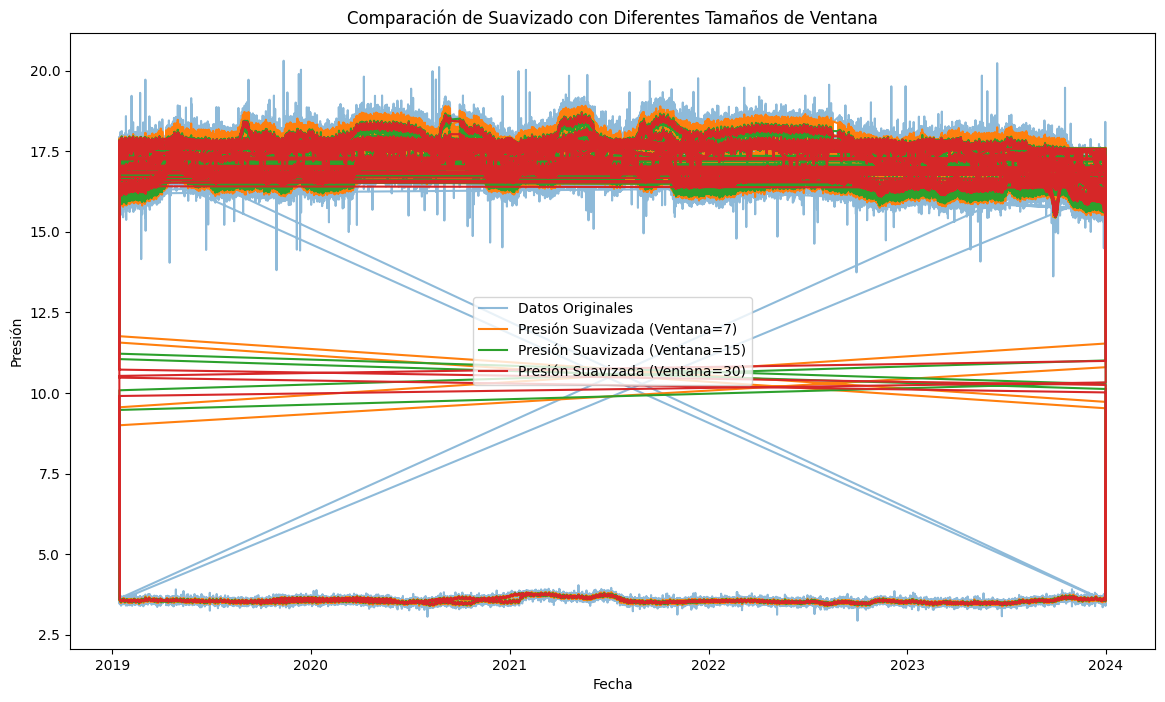


Errores de Suavizado (MAE y MSE):
Ventana=7 | MAE: 0.0484 | MSE: 0.0087
Ventana=15 | MAE: 0.0740 | MSE: 0.0231
Ventana=30 | MAE: 0.0931 | MSE: 0.0388


In [15]:
#Suavizado de variabilidad:Usaremos una media móvil simple para suavizar la variabilidad en las columnas numéricas. Esto ayuda a reducir el ruido en los datos y a observar mejor las tendencias.
# Tamaños de ventana a probar
ventanas = [7, 15, 30]

# Graficar los resultados de suavizado para la columna 'Presion'
plt.figure(figsize=(14, 8))
plt.plot(Contugas['Fecha'], Contugas['Presion'], label='Datos Originales', alpha=0.5)

# Diccionario para almacenar los errores
errores = {}

for ventana in ventanas:
    # Crear la columna de presión suavizada
    Contugas[f'Presion_suavizada_{ventana}'] = Contugas['Presion'].rolling(window=ventana, center=True).mean()
    
    # Graficar la serie suavizada
    plt.plot(Contugas['Fecha'], Contugas[f'Presion_suavizada_{ventana}'], label=f'Presión Suavizada (Ventana={ventana})')
    
    # Calcular MAE y MSE eliminando los valores nulos generados por el suavizado
    suavizada = Contugas[f'Presion_suavizada_{ventana}'].dropna()
    original = Contugas['Presion'][suavizada.index]
    mae = mean_absolute_error(original, suavizada)
    mse = mean_squared_error(original, suavizada)
    
    # Guardar los errores en el diccionario
    errores[ventana] = {'MAE': mae, 'MSE': mse}
    print(f"Ventana={ventana} | MAE: {mae:.4f} | MSE: {mse:.4f}")

# Mostrar la leyenda y etiquetas del gráfico
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Presión')
plt.title('Comparación de Suavizado con Diferentes Tamaños de Ventana')
plt.show()

# Mostrar los errores para cada ventana
print("\nErrores de Suavizado (MAE y MSE):")
for ventana, error in errores.items():
    print(f"Ventana={ventana} | MAE: {error['MAE']:.4f} | MSE: {error['MSE']:.4f}")


 la ventana de 7 días parece la mejor opción por sus bajos errores(MAE: 0.0484 y MSE: 0.0087), lo que indica que el suavizado sigue más de cerca los datos originales y reduce solo una pequeña cantidad de ruido. Esta opción es ideal si deseas observar tendencias a corto plazo sin perder mucho detalle en la variabilidad.

In [16]:
Contugas['Presion_suavizada_7'] = Contugas['Presion'].rolling(window=7, center=True).mean()

In [17]:
# Definiendo el umbral para identificar valores negativos inusuales en la columna 'Temperatura'
umbral_temperatura = Contugas['Temperatura'].quantile(0.01)
print("Umbral de temperatura:", umbral_temperatura)

# Reemplazar valores negativos inusuales con el valor suavizado
Contugas['Temperatura'] = Contugas.apply(
    lambda row: row['Temperatura'] if row['Temperatura'] < umbral_temperatura else row['Temperatura'],
    axis=1
)

# Elimina las columnas innecesarias
Contugas.drop(['Presion_suavizada_7','Presion_suavizada_15','Presion_suavizada_30'], axis=1, inplace=True)
print(Contugas[['Fecha', 'Presion', 'Temperatura']].head(10))

Umbral de temperatura: 16.513425420794913
                Fecha    Presion  Temperatura
0 2019-01-14 00:00:00  17.732563    28.209354
1 2019-01-14 01:00:00  17.747776    28.518614
2 2019-01-14 02:00:00  17.758916    28.230191
3 2019-01-14 03:00:00  17.727940    27.811509
4 2019-01-14 04:00:00  17.746484    27.795293
5 2019-01-14 05:00:00  17.735540    27.666457
6 2019-01-14 06:00:00  17.731800    27.532345
7 2019-01-14 07:00:00  17.715307    27.279564
8 2019-01-14 08:00:00  17.702883    27.084978
9 2019-01-14 09:00:00  17.711532    28.825257


In [18]:
Contugas.describe()

,Fecha,Presion,Temperatura,Volumen,Mes,Año
count,847960,847960.000000,847960.000000,847960.000000,847960.000000,847960.000000
mean,2021-07-08 22:08:19.659418112,16.072957,25.198239,62.328206,6.552684,2021.015883
min,2019-01-14 00:00:00,2.934873,-5.257899,0.000000,1.000000,2019.000000
25%,2020-04-13 23:00:00,17.097350,22.693027,0.000000,4.000000,2020.000000
50%,2021-07-07 06:00:00,17.570449,25.379859,21.773567,7.000000,2021.000000
75%,2022-10-06 02:15:00,17.694254,27.886244,99.319649,10.000000,2022.000000
max,2023-12-31 23:00:00,20.307852,50.019853,577.413425,12.000000,2023.000000
std,NaN,4.186408,3.790497,80.498112,3.438718,1.406038


## 3. Tecnicas para un primer entendimiento de los datos

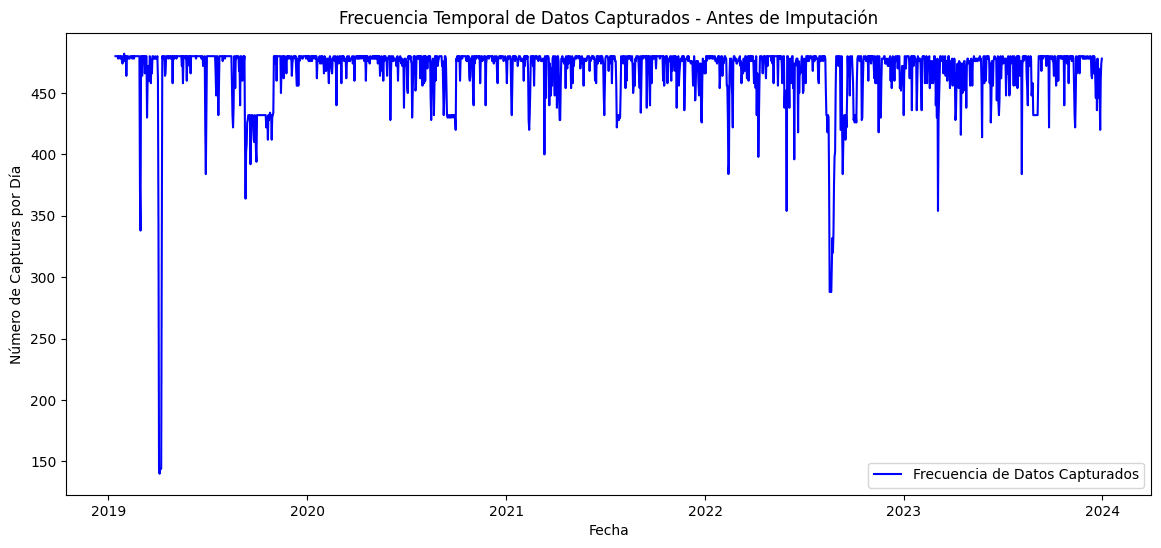

Resumen de datos capturados por día:
count    1813.000000
mean      467.710976
std        27.602834
min       140.000000
25%       466.000000
50%       478.000000
75%       480.000000
max       482.000000
Name: Volumen, dtype: float64


In [19]:
#Revisión de la Frecuencia Temporal de los Datos: Dado que los datos abarcan varios años, verificando si existen períodos de tiempo con poca o nula captura de datos (especialmente en los primeros años). Esto puede afectar la estabilidad del análisis temporal, por lo que podrías imputar o interpolar valores en intervalos específicos si es necesario.
# Resampleo diario para ver los períodos de datos faltantes
Contugas['Fecha'] = pd.to_datetime(Contugas['Fecha'], errors='coerce')
Contugas.set_index('Fecha', inplace=True)
Contugas_daily = Contugas.resample('D').count()

# Visualización de los datos antes de la imputación
plt.figure(figsize=(14, 6))
plt.plot(Contugas_daily.index, Contugas_daily['Volumen'], label='Frecuencia de Datos Capturados', color='b')
plt.title('Frecuencia Temporal de Datos Capturados - Antes de Imputación')
plt.xlabel('Fecha')
plt.ylabel('Número de Capturas por Día')
plt.legend()
plt.show()

# Paso 2: Verificar períodos de datos faltantes
print("Resumen de datos capturados por día:")
print(Contugas_daily['Volumen'].describe())

Teniendo presente que el minimo de capturas de informacion por dia es de 140 registros, no se procede a realizar ningun filtro de la informacion ni se requiere ninguna imputacion de valores nulos.

In [20]:
# Obteniendo feriados en Perú con el objwtivo de realizar analisis de comportamiento
#!pip install holidays
import holidays  

# Obtener los feriados en Perú para los años presentes en el DataFrame
años = Contugas['Año'].unique()
peru_holidays = holidays.Peru(years=años)

# Convertir las fechas de los feriados a formato de string "YYYY-MM-DD"
feriados_peru = {fecha.strftime("%Y-%m-%d") for fecha in peru_holidays.keys()}

# Crear una columna que indique si la fecha es un feriado en Perú
Contugas['Es_Feriado'] = Contugas.index.strftime("%Y-%m-%d").isin(feriados_peru)

# Mostrar las primeras filas para verificar la columna 'Es_Feriado'
print(Contugas[['Presion', 'Temperatura', 'Volumen', 'Cliente', 'Es_Feriado']].head())
print(Contugas['Es_Feriado'].value_counts())
print(Contugas[Contugas['Es_Feriado']==True])

                       Presion  Temperatura    Volumen   Cliente  Es_Feriado
Fecha                                                                       
2019-01-14 00:00:00  17.732563    28.209354  20.969751  CLIENTE1       False
2019-01-14 01:00:00  17.747776    28.518614  17.845739  CLIENTE1       False
2019-01-14 02:00:00  17.758916    28.230191  20.975914  CLIENTE1       False
2019-01-14 03:00:00  17.727940    27.811509  20.592299  CLIENTE1       False
2019-01-14 04:00:00  17.746484    27.795293  21.690626  CLIENTE1       False
Es_Feriado
False    816302
True      31658
Name: count, dtype: int64
                       Presion  Temperatura     Volumen    Cliente  Mes   Año  \
Fecha                                                                           
2019-04-18 00:00:00  17.627045    29.472940   25.745104   CLIENTE1    4  2019   
2019-04-18 01:00:00  17.664496    29.313798   24.751187   CLIENTE1    4  2019   
2019-04-18 02:00:00  17.642499    29.795461   25.482691   CLIENTE1  

Cantidad de ceros en Volumen: 270660
Cantidad de ceros en Presión: 0
Cantidad de ceros en Temperatura: 0 


Primeros días con más ceros en Volumen:
2019-01-14    142
2019-01-15    154
2019-01-16    133
2019-01-17    145
2019-01-18    147
dtype: int64


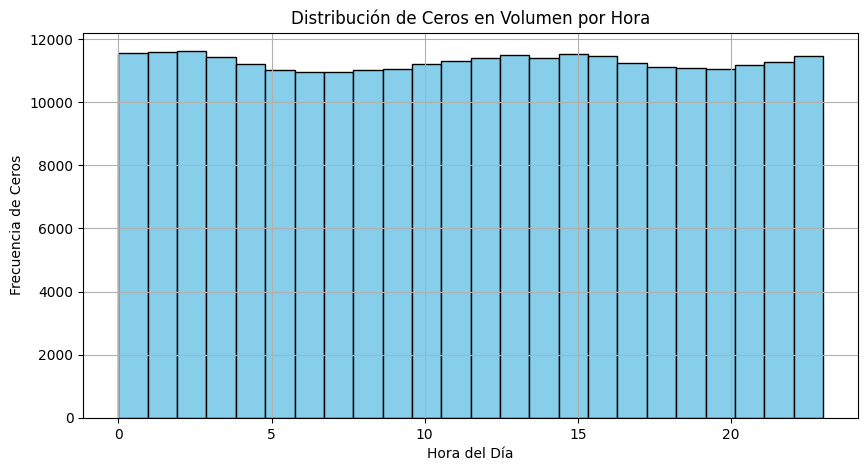

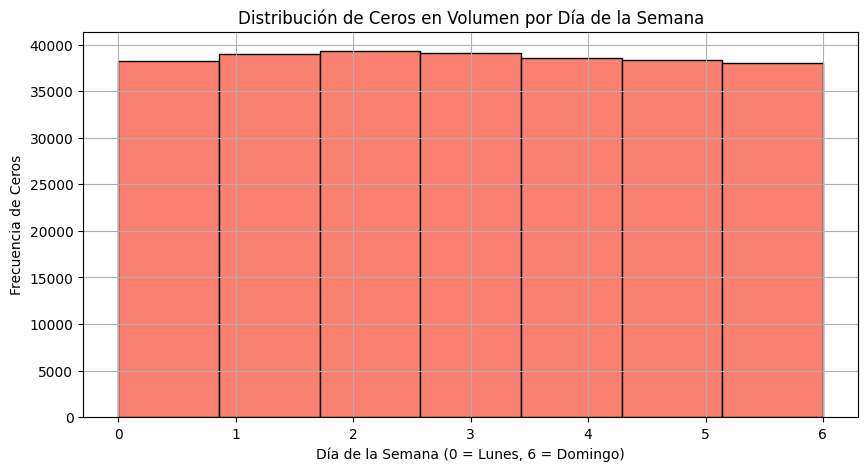

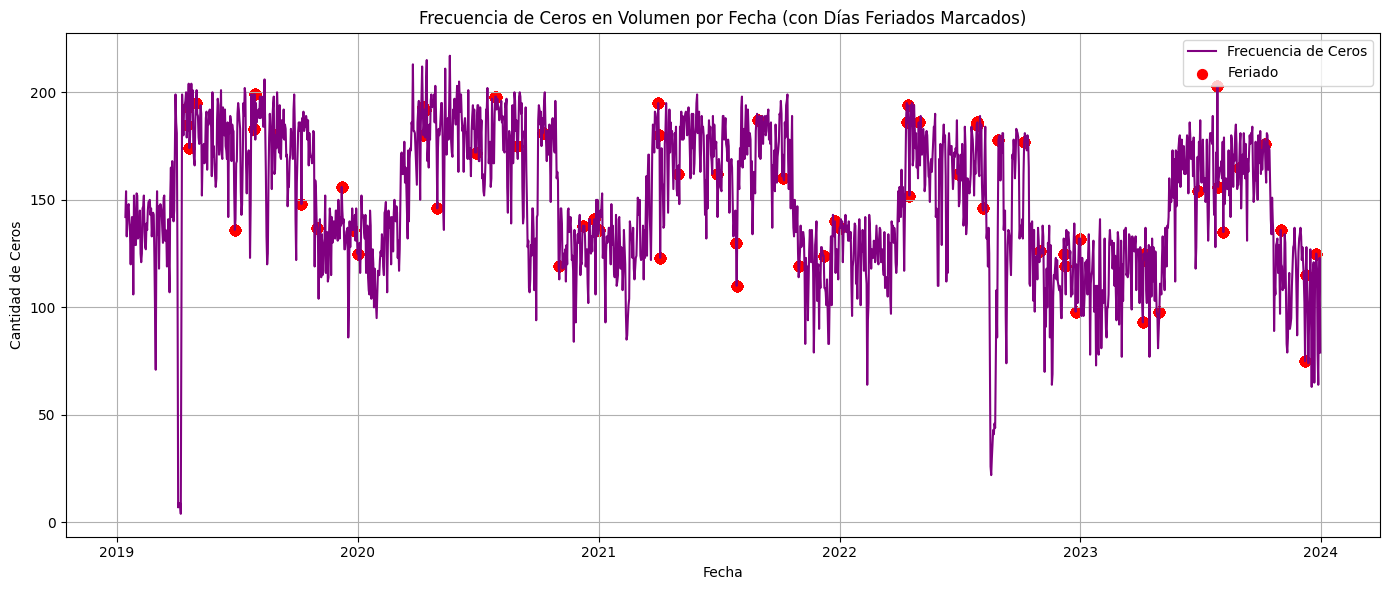

In [21]:
#Tratamiento de Valores Cero: Aunque los ceros en volumen o presión pueden ser normales, sería útil analizarlos con más detalle.
Contugas.index = pd.to_datetime(Contugas.index)
# Identificar los ceros en 'Volumen' y 'Presión'
ceros_volumen = Contugas[Contugas['Volumen'] == 0]
ceros_presion = Contugas[Contugas['Presion'] == 0]
ceros_temperatura = Contugas[Contugas['Temperatura'] == 0]

# Contar los ceros
num_ceros_volumen = ceros_volumen.shape[0]
num_ceros_presion = ceros_presion.shape[0]
num_ceros_temperatura  = ceros_temperatura.shape[0]
print(f"Cantidad de ceros en Volumen: {num_ceros_volumen}")
print(f"Cantidad de ceros en Presión: {num_ceros_presion}")
print(f"Cantidad de ceros en Temperatura: {num_ceros_presion} \n")


# Obtener feriados en Perú para los años presentes en el DataFrame
años = Contugas['Año'].unique()
peru_holidays = holidays.Peru(years=años)

# Crear la columna 'Es_Feriado' en Contugas
feriados_peru = {fecha.strftime("%Y-%m-%d") for fecha in peru_holidays.keys()}
Contugas['Es_Feriado'] = Contugas.index.strftime("%Y-%m-%d").isin(feriados_peru)

# Filtrar ceros en volumen
ceros_volumen = Contugas[Contugas['Volumen'] == 0].copy()

# Agrupando por fecha para ver si los ceros ocurren en días específicos
zeros_por_fecha_volumen = ceros_volumen.groupby(ceros_volumen.index.date).size()
print("\nPrimeros días con más ceros en Volumen:")
print(zeros_por_fecha_volumen.head())

# Análisis de patrones: distribución de ceros en volumen por hora y día de la semana
ceros_volumen['Hora'] = ceros_volumen.index.hour
ceros_volumen['Día_Semana'] = ceros_volumen.index.dayofweek

# Histograma de frecuencia de ceros por hora
plt.figure(figsize=(10, 5))
ceros_volumen['Hora'].hist(bins=24, color='skyblue', edgecolor='black')
plt.title('Distribución de Ceros en Volumen por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia de Ceros')
plt.show()

# Histograma de frecuencia de ceros por día de la semana
plt.figure(figsize=(10, 5))
ceros_volumen['Día_Semana'].hist(bins=7, color='salmon', edgecolor='black')
plt.title('Distribución de Ceros en Volumen por Día de la Semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Frecuencia de Ceros')
plt.show()

# Gráfico de línea de frecuencia de ceros en volumen por fecha
plt.figure(figsize=(14, 6))
ceros_por_fecha = ceros_volumen.groupby(ceros_volumen.index.date).size()
ceros_por_fecha.plot(color='purple', label='Frecuencia de Ceros')
feriados_con_ceros = ceros_volumen[ceros_volumen['Es_Feriado']].index.date 
feriados_con_ceros = pd.Series(ceros_por_fecha[feriados_con_ceros].dropna())
plt.scatter(feriados_con_ceros.index, feriados_con_ceros.values, color='red', marker='o', s=50, label='Feriado') 
plt.title('Frecuencia de Ceros en Volumen por Fecha (con Días Feriados Marcados)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ceros')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


En el análisis de los registros de volumen de gas natural, se identificaron 270,660 observaciones con un valor de cero en el campo de volumen, mientras que los demás indicadores no mostraron esta anomalía. Para entender si estos valores representan anomalías genuinas o posibles fallas en la medición, se introdujo la variable Es_Feriado, que identifica si la fecha corresponde a un día feriado.

A través del análisis de frecuencia de los ceros en el volumen por día de la semana y por hora del día, no se observó ningún patrón específico; los ceros en el volumen aparecieron de forma aproximadamente constante y sin concentraciones en días o franjas horarias particulares. Sin embargo, al analizar la cantidad de ceros por fecha, incluyendo la identificación de días feriados, se observó que en estos días los ceros en el volumen presentan patrones que podrían considerarse anomalías en el registro de demanda.

Por otro lado, en fechas no feriadas, aquellos registros con un conteo de ceros en el volumen inferior a 70 podrían ser atribuibles a fallas en la medición, más que a eventos de demanda nula. En consecuencia, se decidió excluir estos registros de la base de datos objetivo para el modelo de predicción de anomalías, con el fin de mejorar la precisión y la calidad del análisis.

Aunque inicialmente se propuso excluir registros con menos de 70 valores cero en días no feriados, se optó por conservar todos los datos siguiendo las recomendaciones académicas. Este análisis se mantuvo como evidencia de exploración.

             count        mean        std  min         25%         50%  \
Cliente                                                                  
CLIENTE1   43412.0   19.976401   7.939171  0.0   16.248989   22.470213   
CLIENTE10  41059.0   11.788209  43.991880  0.0    0.000000    0.000000   
CLIENTE11  42248.0  131.648637  34.225487  0.0  110.646887  136.075518   
CLIENTE12  41776.0   33.731496  41.952033  0.0    0.000000    0.000000   
CLIENTE13  41059.0   10.276088  41.184079  0.0    0.000000    0.000000   
CLIENTE14  43415.0    7.301900   5.257558  0.0    3.097458    6.749423   
CLIENTE15  42428.0   12.553861  47.565636  0.0    0.000000    0.000000   
CLIENTE16  43147.0  178.133946  74.649969  0.0  114.279073  210.869993   
CLIENTE17  43412.0   20.564425   5.566153  0.0   18.426473   21.748120   
CLIENTE18  41382.0   61.758087  18.201164  0.0   51.444677   62.074886   
CLIENTE19  42305.0   15.918062  59.478001  0.0    0.000000    0.000000   
CLIENTE2   41382.0   61.819045  17.495

C:\Users\1234\AppData\Local\Temp\ipykernel_40836\2511324058.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


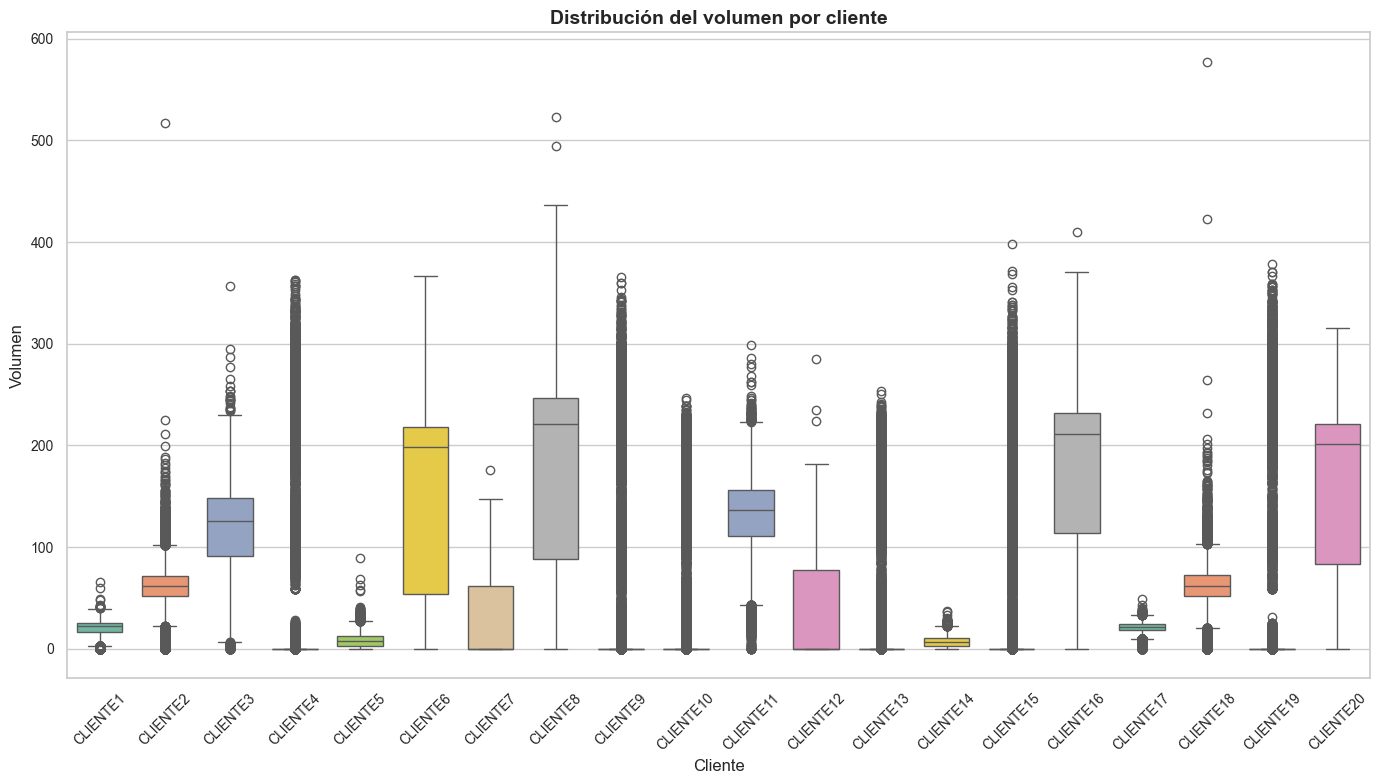

In [25]:
#analisis por cliente
estadisticas_por_cliente = Contugas.groupby('Cliente')['Volumen'].describe()

# Mostrar estadísticas generales por cliente
print(estadisticas_por_cliente)

# Gráfico de boxplot para visualizar la distribución del volumen por cliente
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.boxplot(
    x='Cliente', 
    y='Volumen', 
    data=Contugas, 
    palette="Set2", 
    showfliers=True,  
    width=0.7  
)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Cliente", fontsize=12)
plt.ylabel("Volumen", fontsize=12)
plt.title("Distribución del volumen por cliente", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
print (Contugas)

                       Presion  Temperatura     Volumen    Cliente  Mes   Año  \
Fecha                                                                           
2019-01-14 00:00:00  17.732563    28.209354   20.969751   CLIENTE1    1  2019   
2019-01-14 01:00:00  17.747776    28.518614   17.845739   CLIENTE1    1  2019   
2019-01-14 02:00:00  17.758916    28.230191   20.975914   CLIENTE1    1  2019   
2019-01-14 03:00:00  17.727940    27.811509   20.592299   CLIENTE1    1  2019   
2019-01-14 04:00:00  17.746484    27.795293   21.690626   CLIENTE1    1  2019   
...                        ...          ...         ...        ...  ...   ...   
2023-12-31 19:00:00  15.751139    27.460652  204.457549  CLIENTE20   12  2023   
2023-12-31 20:00:00  15.614858    27.010382  186.512096  CLIENTE20   12  2023   
2023-12-31 21:00:00  15.598944    26.709100  204.456461  CLIENTE20   12  2023   
2023-12-31 22:00:00  15.730040    27.266090  203.695596  CLIENTE20   12  2023   
2023-12-31 23:00:00  15.6244

In [21]:
import pandas as pd

def analizar_consumo_por_cliente(df):

    resultados = {}
    df_resultado = df.copy()
    
    # Obtener lista de clientes únicos
    clientes = df['Cliente'].unique()
    
    for cliente in clientes:
        # Filtrar por cliente
        df_cliente = df[df['Cliente'] == cliente]
        
        # Calcular estadísticas descriptivas
        stats = df_cliente['Volumen'].describe()
        resultados[cliente] = stats
        
        # Calcular percentiles 10 y 90
        p10 = df_cliente['Volumen'].quantile(0.10)
        p90 = df_cliente['Volumen'].quantile(0.90)
        
        # Crear una nueva columna indicando si el consumo es anómalo
        df_resultado.loc[df_resultado['Cliente'] == cliente, 'Anomalia'] = df_cliente['Volumen'].apply(
            lambda x: 'Anómalo' if x < p10 or x > p90 else 'Normal'
        )
    
    return resultados, df_resultado

# Ejemplo de uso
stats_clientes, df_con_anomalias = analizar_consumo_por_cliente(Contugas)

# Ver estadísticas descriptivas para CLIENTE1
print("Estadísticas para CLIENTE1:")
print(stats_clientes['CLIENTE1'])

# Ver un ejemplo del DataFrame con la columna de anomalías
print("\nEjemplo de DataFrame con anomalías:")
print(df_con_anomalias.head())


Estadísticas para CLIENTE1:
count    43412.000000
mean        19.976401
std          7.939171
min          0.000000
25%         16.248989
50%         22.470213
75%         25.533223
max         65.936644
Name: Volumen, dtype: float64

Ejemplo de DataFrame con anomalías:
                       Presion  Temperatura    Volumen   Cliente  Mes   Año  \
Fecha                                                                         
2019-01-14 00:00:00  17.732563    28.209354  20.969751  CLIENTE1    1  2019   
2019-01-14 01:00:00  17.747776    28.518614  17.845739  CLIENTE1    1  2019   
2019-01-14 02:00:00  17.758916    28.230191  20.975914  CLIENTE1    1  2019   
2019-01-14 03:00:00  17.727940    27.811509  20.592299  CLIENTE1    1  2019   
2019-01-14 04:00:00  17.746484    27.795293  21.690626  CLIENTE1    1  2019   

                     Es_Feriado Anomalia  
Fecha                                     
2019-01-14 00:00:00       False   Normal  
2019-01-14 01:00:00       False   Normal  
201

La función analizar_consumo_por_cliente recibe como entrada un DataFrame df, que contiene información sobre el consumo de varios clientes, y realiza un análisis detallado para cada cliente. El resultado incluye estadísticas descriptivas y una clasificación de los consumos como normales o anómalos, lo que permitirá generar la varaible dependiente que será utilizada en para el desarrollo de modelos supervisados. Este cod incluye:


1. Inicialización de Estructuras:

* Se crea un diccionario vacío resultados para almacenar las estadísticas descriptivas de cada cliente.
* Se hace una copia del DataFrame original (df_resultado) para trabajar sin modificar el conjunto de datos original.

2. Identificación de Clientes Únicos:

* A través de df['Cliente'].unique(), se obtiene una lista única de los clientes presentes en el conjunto de datos.

3. Análisis por Cliente:

* Para cada cliente, se filtran los registros correspondientes en un DataFrame temporal (df_cliente).
* Se calculan estadísticas descriptivas básicas del consumo (Volumen) utilizando el método describe() de pandas. Estas estadísticas incluyen la media, la desviación estándar, los valores mínimo y máximo, entre otros.

3. Detección de Anomalías:

* Se calculan los percentiles 10 y 90 del consumo del cliente utilizando el método quantile().
* Se clasifica cada registro como "Normal" o "Anómalo" dependiendo de si el volumen está fuera del rango definido por estos percentiles.
* Esta clasificación se almacena en una nueva columna llamada Anomalia dentro del DataFrame de resultados.

4. Resultados Finales:

* La función retorna un diccionario con las estadísticas descriptivas por cliente (resultados) y el DataFrame actualizado (df_resultado), que incluye la columna con las etiquetas de anomalías.

In [24]:
def contar_anomalias_por_cliente(df):
    
    # Agrupar por cliente y contar las etiquetas
    conteo = df.groupby('Cliente')['Anomalia'].value_counts().unstack(fill_value=0)
    return conteo

# Contar anomalías por cliente
frecuencia_anomalias = contar_anomalias_por_cliente(df_con_anomalias)

# Mostrar el resultado
print(frecuencia_anomalias)


Anomalia   Anómalo  Normal
Cliente                   
CLIENTE1      8684   34728
CLIENTE10     4106   36953
CLIENTE11     8450   33798
CLIENTE12     4178   37598
CLIENTE13     4106   36953
CLIENTE14     8684   34731
CLIENTE15     4243   38185
CLIENTE16     8630   34517
CLIENTE17     8684   34728
CLIENTE18     8278   33104
CLIENTE19     4231   38074
CLIENTE2      8278   33104
CLIENTE20     8562   34246
CLIENTE3      8450   33798
CLIENTE4      4231   38074
CLIENTE5      4342   39073
CLIENTE6      8562   34246
CLIENTE7      4178   37598
CLIENTE8      8630   34517
CLIENTE9      4243   38185


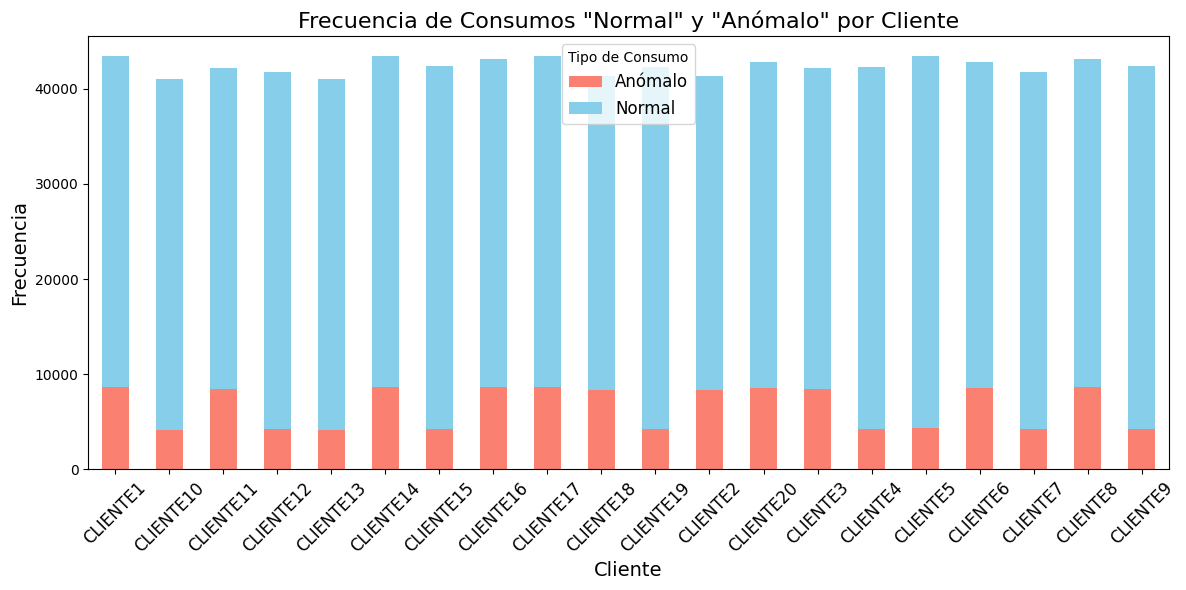

In [25]:
import matplotlib.pyplot as plt

def graficar_frecuencia_anomalias(frecuencia):

    # Crear el gráfico de barras apiladas
    ax = frecuencia.plot(
        kind='bar', 
        stacked=True, 
        figsize=(12, 6), 
        color={'Normal': 'skyblue', 'Anómalo': 'salmon'}
    )
    
    # Añadir título y etiquetas
    plt.title('Frecuencia de Consumos "Normal" y "Anómalo" por Cliente', fontsize=16)
    plt.xlabel('Cliente', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title='Tipo de Consumo', fontsize=12)
    plt.tight_layout()  # Ajustar el diseño para evitar cortes
    plt.show()

# Graficar las frecuencias
graficar_frecuencia_anomalias(frecuencia_anomalias)


La gráfica es un diagrama de barras apiladas que muestra la frecuencia de consumos "Normal" y "Anómalo" por Cliente. Es posible observar:

* La mayoría de los clientes tienen una cantidad mucho mayor de consumos normales (en azul) en comparación con consumos anómalos (en rojo).
* El patrón parece consistente entre los clientes: la proporción de consumos anómalos es significativamente menor en relación a los normales.
* No se observan clientes con comportamientos atípicos en términos de proporción entre consumos normales y anómalos.
* Esto sugiere que los consumos normales son el comportamiento predominante para todos los clientes analizados.

In [44]:
df_con_anomalias.to_csv("df_con_anomalias.csv", index=False)
